In [58]:
#Important libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [59]:
#Read the dataset
data_file = 'battles_2020_12_09_use.csv'
battles_data = pd.read_csv(data_file)
#data shape --> (47881,61)
print(battles_data.shape)
#View the dataset
battles_data.head()

(47881, 61)


,battleTime,gameMode.id,average.startingTrophies,winner.startingTrophies,winner.trophyChange,winner.crowns,loser.startingTrophies,loser.trophyChange,loser.crowns,winner.card1.id,...,loser.cards.list,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.common.count,loser.rare.count,loser.epic.count,loser.legendary.count,loser.elixir.average
0,2020-12-09 15:40:02+00:00,72000006,4635.0,4635,30,3,4635,-30,0,Giant,...,"[P.E.K.K.A, Minions, Wizard, Ice Wizard, Fire ...",98,6,1,1,3,2,1,2,3.625
1,2020-12-09 15:09:05+00:00,72000006,4583.5,4584,29,2,4583,-29,1,Hog Rider,...,"[Skeleton Army, Wizard, Minion Horde, Goblin G...",103,5,0,3,3,2,3,0,3.875
2,2020-12-09 04:20:22+00:00,72000006,4670.0,4676,28,2,4664,-28,1,Ram Rider,...,"[Knight, Bomber, Wizard, Bats, Mega Knight, Ar...",95,5,0,3,5,1,1,1,3.500
3,2020-12-09 01:28:08+00:00,72000006,5778.0,5787,28,2,5769,-28,1,Goblin Giant,...,"[Golem, Baby Dragon, Lumberjack, Mega Minion, ...",104,5,1,2,1,2,3,2,4.250
4,2020-12-09 22:57:54+00:00,72000006,5420.5,5416,30,2,5425,-30,1,Goblin Barrel,...,"[Golem, Baby Dragon, Lumberjack, Cannon Cart, ...",104,6,0,2,0,0,6,2,4.375


In [60]:
#Creates a new dataset with new columns our model will be focusing on

columns = ['winner.startingTrophies', 'loser.startingTrophies',
        'winner.card1.id', 'winner.card2.id','winner.card3.id','winner.card4.id', 'winner.card5.id', 'winner.card6.id', 'winner.card7.id', 'winner.card8.id',
        'loser.card1.id', 'loser.card2.id', 'loser.card3.id', 'loser.card4.id', 'loser.card5.id', 'loser.card6.id', 'loser.card7.id', 'loser.card8.id']


battles_data_1 = battles_data[columns].copy()
battles_data_1.head() 

,winner.startingTrophies,loser.startingTrophies,winner.card1.id,winner.card2.id,winner.card3.id,winner.card4.id,winner.card5.id,winner.card6.id,winner.card7.id,winner.card8.id,loser.card1.id,loser.card2.id,loser.card3.id,loser.card4.id,loser.card5.id,loser.card6.id,loser.card7.id,loser.card8.id
0,4635,4635,Giant,Fireball,Inferno Dragon,Hog Rider,Princess,Goblin Gang,Witch,Miner,P.E.K.K.A,Tombstone,Minions,Ice Wizard,Zap,Fire Spirits,Electro Wizard,Wizard
1,4584,4583,Hog Rider,Firecracker,Ice Wizard,Baby Dragon,Inferno Dragon,Mega Knight,Bandit,Wizard,Minion Horde,Skeleton Army,Rage,Elite Barbarians,Wizard,Fireball,Goblin Gang,Tornado
2,4676,4664,Ram Rider,Baby Dragon,Arrows,Battle Healer,Electro Wizard,Lumberjack,P.E.K.K.A,Firecracker,Bats,Knight,Wizard,Arrows,Bomber,Goblin Barrel,Mega Knight,Zap
3,5787,5769,Goblin Giant,Minion Horde,Zap,Bats,Sparky,Miner,Spear Goblins,Goblin Gang,Golem,Lumberjack,Baby Dragon,Zap,Elixir Collector,Mega Minion,Night Witch,Tornado
4,5416,5425,Goblin Barrel,Skeleton Barrel,Knight,Dart Goblin,Mother Witch,Skeleton Army,Bomb Tower,The Log,Golem,Cannon Cart,Electro Dragon,Lumberjack,Mother Witch,Baby Dragon,Tornado,Barbarian Barrel


In [ ]:
#renaming our columns to create the official dataset
battles_data_1.columns = ['startingTrophies', 'startingTrophies',
        'card1.id', 'card2.id','card3.id','card4.id', 'card5.id', 'card6.id', 'card7.id', 'card8.id',
        'card1.id', 'card2.id', 'card3.id', 'card4.id', 'card5.id', 'card6.id', 'card7.id', 'card8.id']

battles_data_1.head()

,startingTrophies,startingTrophies,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id
0,4635,4635,Giant,Fireball,Inferno Dragon,Hog Rider,Princess,Goblin Gang,Witch,Miner,P.E.K.K.A,Tombstone,Minions,Ice Wizard,Zap,Fire Spirits,Electro Wizard,Wizard
1,4584,4583,Hog Rider,Firecracker,Ice Wizard,Baby Dragon,Inferno Dragon,Mega Knight,Bandit,Wizard,Minion Horde,Skeleton Army,Rage,Elite Barbarians,Wizard,Fireball,Goblin Gang,Tornado
2,4676,4664,Ram Rider,Baby Dragon,Arrows,Battle Healer,Electro Wizard,Lumberjack,P.E.K.K.A,Firecracker,Bats,Knight,Wizard,Arrows,Bomber,Goblin Barrel,Mega Knight,Zap
3,5787,5769,Goblin Giant,Minion Horde,Zap,Bats,Sparky,Miner,Spear Goblins,Goblin Gang,Golem,Lumberjack,Baby Dragon,Zap,Elixir Collector,Mega Minion,Night Witch,Tornado
4,5416,5425,Goblin Barrel,Skeleton Barrel,Knight,Dart Goblin,Mother Witch,Skeleton Army,Bomb Tower,The Log,Golem,Cannon Cart,Electro Dragon,Lumberjack,Mother Witch,Baby Dragon,Tornado,Barbarian Barrel


In [62]:
data_1 = pd.concat([battles_data_1.iloc[:, [0]], battles_data_1.iloc[:, 2:10]], axis=1)
data_1["Winner"] = 1
data_1.head()

,startingTrophies,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id,Winner
0,4635,Giant,Fireball,Inferno Dragon,Hog Rider,Princess,Goblin Gang,Witch,Miner,1
1,4584,Hog Rider,Firecracker,Ice Wizard,Baby Dragon,Inferno Dragon,Mega Knight,Bandit,Wizard,1
2,4676,Ram Rider,Baby Dragon,Arrows,Battle Healer,Electro Wizard,Lumberjack,P.E.K.K.A,Firecracker,1
3,5787,Goblin Giant,Minion Horde,Zap,Bats,Sparky,Miner,Spear Goblins,Goblin Gang,1
4,5416,Goblin Barrel,Skeleton Barrel,Knight,Dart Goblin,Mother Witch,Skeleton Army,Bomb Tower,The Log,1


In [63]:
data_2 = pd.concat([battles_data_1.iloc[:, [1]], battles_data_1.iloc[:, 10:]], axis=1)
data_2["Winner"] = 0
data_2.head()

,startingTrophies,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id,Winner
0,4635,P.E.K.K.A,Tombstone,Minions,Ice Wizard,Zap,Fire Spirits,Electro Wizard,Wizard,0
1,4583,Minion Horde,Skeleton Army,Rage,Elite Barbarians,Wizard,Fireball,Goblin Gang,Tornado,0
2,4664,Bats,Knight,Wizard,Arrows,Bomber,Goblin Barrel,Mega Knight,Zap,0
3,5769,Golem,Lumberjack,Baby Dragon,Zap,Elixir Collector,Mega Minion,Night Witch,Tornado,0
4,5425,Golem,Cannon Cart,Electro Dragon,Lumberjack,Mother Witch,Baby Dragon,Tornado,Barbarian Barrel,0


In [64]:
#Appending the data together vertically
data_battles = pd.concat([data_1,data_2], ignore_index=True)
#Check for null values
print(data_battles.shape)
data_battles.head()

(95762, 10)


,startingTrophies,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id,Winner
0,4635,Giant,Fireball,Inferno Dragon,Hog Rider,Princess,Goblin Gang,Witch,Miner,1
1,4584,Hog Rider,Firecracker,Ice Wizard,Baby Dragon,Inferno Dragon,Mega Knight,Bandit,Wizard,1
2,4676,Ram Rider,Baby Dragon,Arrows,Battle Healer,Electro Wizard,Lumberjack,P.E.K.K.A,Firecracker,1
3,5787,Goblin Giant,Minion Horde,Zap,Bats,Sparky,Miner,Spear Goblins,Goblin Gang,1
4,5416,Goblin Barrel,Skeleton Barrel,Knight,Dart Goblin,Mother Witch,Skeleton Army,Bomb Tower,The Log,1


In [65]:
#shuffling data to esnure proper data distribution in training and testing of the model
shuffled_data_battles = data_battles.sample(frac=1).reset_index(drop=True)
shuffled_data_battles.head()

,startingTrophies,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id,Winner
0,5420,Three Musketeers,Zap,Dark Prince,Mother Witch,Hunter,Heal Spirit,Royal Hogs,Fisherman,0
1,5498,Bomb Tower,Ice Golem,Dart Goblin,Earthquake,Hog Rider,The Log,Tornado,Electro Dragon,0
2,4584,Bomb Tower,Bats,Fireball,Miner,Knight,Wall Breakers,Spear Goblins,Arrows,0
3,4231,Giant Skeleton,Furnace,Inferno Dragon,Mother Witch,Poison,The Log,Baby Dragon,Ice Golem,1
4,4474,Knight,Inferno Tower,Rocket,Electro Wizard,The Log,Goblin Gang,Princess,Goblin Barrel,1


In [ ]:
#converting categorical data into numeric value where XGBoost handles categories internally without assuming order
cate_cols = shuffled_data_battles.columns[1:9]

for col in cate_cols:
    shuffled_data_battles[col] = shuffled_data_battles[col].astype('category')



In [68]:
#Establishing x and y 
X = shuffled_data_battles.drop('Winner',axis=1)
y = shuffled_data_battles['Winner']
X

,startingTrophies,card1.id,card2.id,card3.id,card4.id,card5.id,card6.id,card7.id,card8.id
0,5420,Three Musketeers,Zap,Dark Prince,Mother Witch,Hunter,Heal Spirit,Royal Hogs,Fisherman
1,5498,Bomb Tower,Ice Golem,Dart Goblin,Earthquake,Hog Rider,The Log,Tornado,Electro Dragon
2,4584,Bomb Tower,Bats,Fireball,Miner,Knight,Wall Breakers,Spear Goblins,Arrows
3,4231,Giant Skeleton,Furnace,Inferno Dragon,Mother Witch,Poison,The Log,Baby Dragon,Ice Golem
4,4474,Knight,Inferno Tower,Rocket,Electro Wizard,The Log,Goblin Gang,Princess,Goblin Barrel
...,...,...,...,...,...,...,...,...,...
95757,5486,P.E.K.K.A,Battle Ram,Royal Ghost,Zap,Magic Archer,Bandit,Electro Wizard,Poison
95758,4919,Cannon,Hog Rider,Electro Wizard,Ice Spirit,Valkyrie,The Log,Archers,Fireball
95759,5836,Knight,Princess,Inferno Tower,Rocket,Goblin Gang,Goblin Barrel,Ice Spirit,The Log
95760,5499,Lava Hound,Baby Dragon,Inferno Dragon,Giant Snowball,Guards,Goblin Cage,Miner,Flying Machine


In [69]:
#Use the train test split function where the train size is 70 % of the data and the test size is 30% 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,train_size=0.7, shuffle=True)

<BarContainer object of 4 artists>

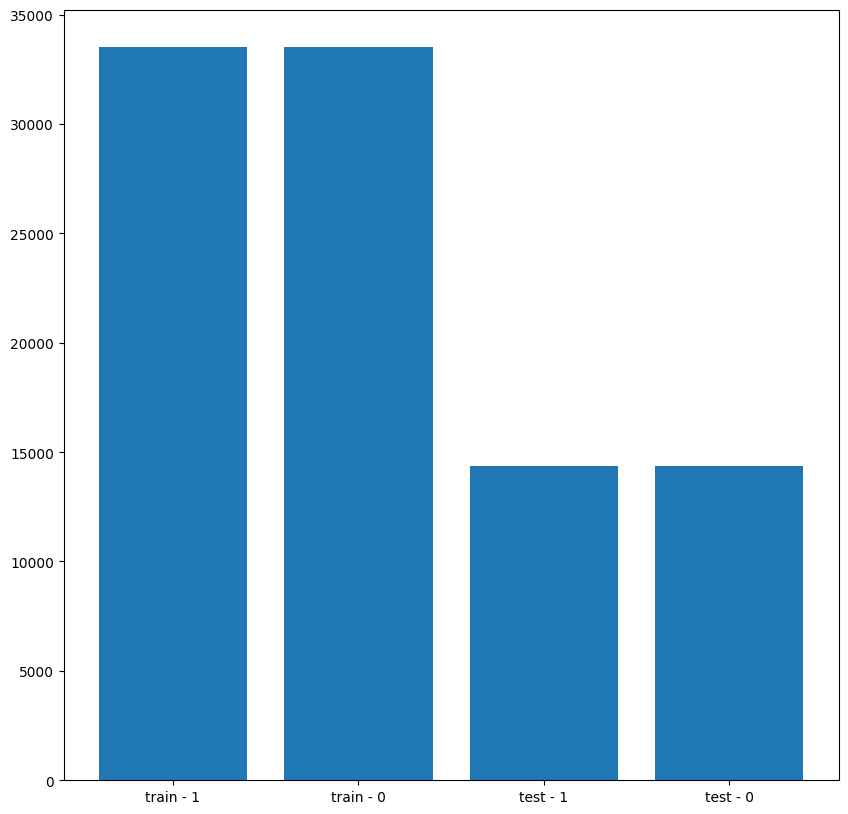

In [72]:
#Checking Data Distribution
train_1 = (y_train == 1).sum()
train_0 = (y_train == 0).sum()

test_1 = (y_test == 1).sum()
test_0 = (y_test == 0).sum()

import matplotlib.pyplot as plt

labels = ['train - 1', 'train - 0', 'test - 1', 'test - 0']
values = [train_1, train_0, test_1, test_0]

plt.figure(figsize=(10,10))
plt.bar(labels,values)


The accuracy of this model is 89.227%


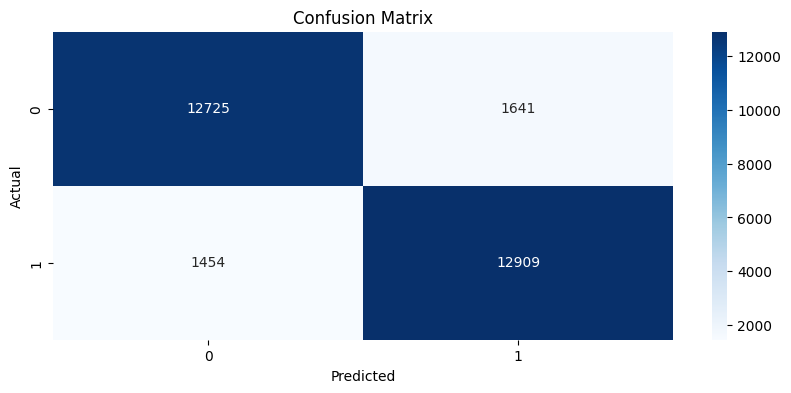

Classification Report of our XGBoost model: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     14366
           1       0.89      0.90      0.89     14363

    accuracy                           0.89     28729
   macro avg       0.89      0.89      0.89     28729
weighted avg       0.89      0.89      0.89     28729



In [ ]:
from xgboost import XGBClassifier,plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#XGB model called 
model = XGBClassifier(enable_categorical=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
###############################################################
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy of this model is {round(accuracy*100,3)}%")
###############################################################
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
###############################################################
report = classification_report(y_test,y_pred)
print("Classification Report of our XGBoost model: ")
print(report)